# Basic stats in python

I like to use a python module called "pingouin" for statistics. It does models that other programs might lack, e.g., mixed Anovas

Here is some information about all the tests it does: https://pingouin-stats.org/api.html

In [1]:
import pingouin as pg
import numpy as np
import pandas as pd
import seaborn as sns

If you got an error try installing pingouin using:

```python
! pip install --user pingouin
```

In [2]:
# ! pip install --user pingouin

## load in data

In [3]:
spreadsheet_file = 'example_data.xlsx'
df = pd.read_excel(spreadsheet_file)
df.head(3)

,ID,CLIN_STATUS,FAMILY_GENE,AGE,SEX,WM_1,WM_2,WM_3
0,1,0.0,MAPT,29,1,45,52,49
1,2,0.0,MAPT,30,1,59,29,32
2,3,0.0,MAPT,31,1,66,35,45


## T-tests

### pairwise

In [4]:
x = df['WM_1']
y = df['WM_2']
pg.ttest(x,y,paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,15.583,198,two-sided,2.927889e-36,"[24.48, 31.57]",1.575,9.065e+32,1.0


You can print additional information by using the .mean(), .std() commands.

In [5]:
print(x.mean(),x.std())
print(y.mean(),y.std())

71.83417085427136 17.432340727027643
43.80904522613066 18.157106703196895


### independent

In [6]:
x = df.loc[df['FAMILY_GENE']=='MAPT','WM_1']
y = df.loc[df['FAMILY_GENE']=='GRN','WM_1']
pg.ttest(x,y,paired=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.622,112.81,two-sided,0.009943,"[2.1, 15.08]",0.475,4.15,0.721


## ANOVAS

### one way

In [7]:
pg.anova(data=df,dv='WM_1',between='FAMILY_GENE')

,Source,ddof1,ddof2,F,p-unc,np2
0,FAMILY_GENE,2,196,15.779,4.425551e-07,0.139


At this point, we might want to start incorporating plots with our results to understand them better

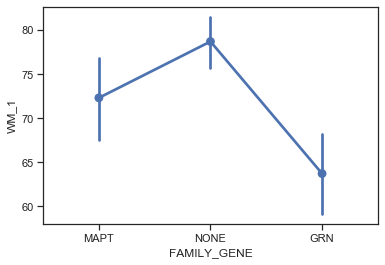

In [8]:
sns.pointplot(x='FAMILY_GENE',y='WM_1',data=df)

### repeated measures
For repeated measures you need a differently formatted dataframe. This is because the dv should be just one column, but as it is currently formated our dv ('WM') actually takes up three columns as each level of the factor is seperate (WM_1,WM_2,WM_3).

The format for the current df is sometimes referred to as 'wide', whereas we want a 'long' dataframe.

In [28]:
#pd.wide_to_long?
df_long = pd.melt(df, id_vars=['ID','CLIN_STATUS','FAMILY_GENE','AGE','SEX'], value_vars=['WM_1', 'WM_2','WM_3'],value_name='ACC')

#rename one column
df_long = df_long.rename(columns={'variable': 'WM_LVL'})
df_long.head(5)

,ID,CLIN_STATUS,FAMILY_GENE,AGE,SEX,WM_LVL,ACC
0,1,0.0,MAPT,29,1,WM_1,45
1,2,0.0,MAPT,30,1,WM_1,59
2,3,0.0,MAPT,31,1,WM_1,66
3,4,0.0,MAPT,32,1,WM_1,77
4,5,2.0,MAPT,74,1,WM_1,84


In [29]:
pg.rm_anova(data=df_long,dv='ACC',within='WM_LVL',subject='ID')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,WM_LVL,2,396,220.221,5.026660e-65,0.527,0.998


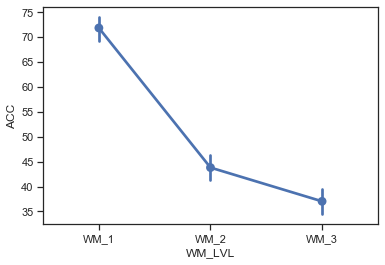

In [30]:
sns.pointplot(x='WM_LVL',y='ACC',data=df_long)

### mixed

In [33]:
pg.mixed_anova(data=df_long,dv='ACC',within='WM_LVL',subject='ID',between='FAMILY_GENE')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,FAMILY_GENE,13768.378,2,196,6884.189,24.750,2.607275e-10,0.202,-
1,WM_LVL,135470.114,2,392,67735.057,230.619,6.227325e-67,0.541,0.998
2,Interaction,6666.343,4,392,1666.586,5.674,1.896732e-04,0.055,-


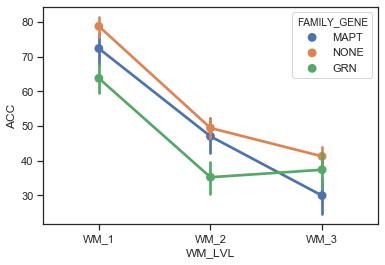

In [31]:
sns.pointplot(x='WM_LVL',y='ACC',hue='FAMILY_GENE',data=df_long)

## Correlation

## Regression